### 迷惑パラメータと周辺された分布

私たちが興味を持つモデルは、ほとんどの場合、複数のパラメータを持っています。モデルを構築するために必要なパラメータは、直接的に関心の無いものが含まれこともあります。つまり、あるパラメータについて、本当は関心がないとしても、モデルを構築するためにそのパラメータを必要に迫られて追加することがあります。私たちが関心している重要な問題に答えるために、正規分布の平均値を推定する必要があるとしましょう。このようなモデルに置いて、正規分布の標準偏差の値が未知である場合、標準偏差に関心がなくても、その値を推定しなければなりません。このようなパラメータを迷惑パラメータと言われます。ベイジアンパラダイムのもとでは、任意の未知なる数量は、全て同じように扱われます。

このような迷惑パラメータをモデルに含まれることによって、不確実性を吸収させることができます。

二つのパラメターたを持つベイズのていりは、次のように書くことができます。３つ以上のパラメータも拡張可能です。

$
p (\theta_1, \theta_2 | y) \propto p(y | \theta_1, \theta_2)p(\theta_1, \theta_2)
$

多数のパラメータを持つ場合と今までの単一パラメータと異なる一つ目の点は、$\theta_1, \theta_2$の同時分布を示す2次元の事後分布を持つということです。さて、$\theta_2$を迷惑パラメータとすると、

$
p(\theta_1|y) = \int p(\theta_1, \theta_2|y)d\theta_2
$

これは$\theta_2$の不確実性を暗黙的に考慮にいれることです。

<AxesSubplot:ylabel='Density'>

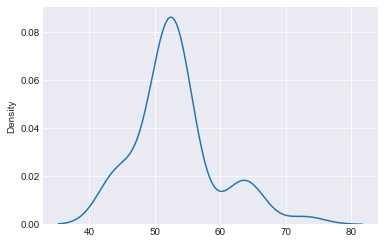

In [4]:
import seaborn as sns
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

data = np.array([51.06, 54, 64, 44, 54, 53, 52,51.06, 62, 73,
                51.06, 54, 64, 44, 54, 53, 52,51.06,
                51.06, 54, 64, 44, 54, 53, 52,51.06,
                51.06, 54, 64, 44, 54, 53, 52,51.06,51.06, 54, 64, 44, 54, 53, 52,51.06, 45, 46])

sns.kdeplot(data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_100 draw iterations (4_000 + 4_400 draws total) took 10 seconds.
/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

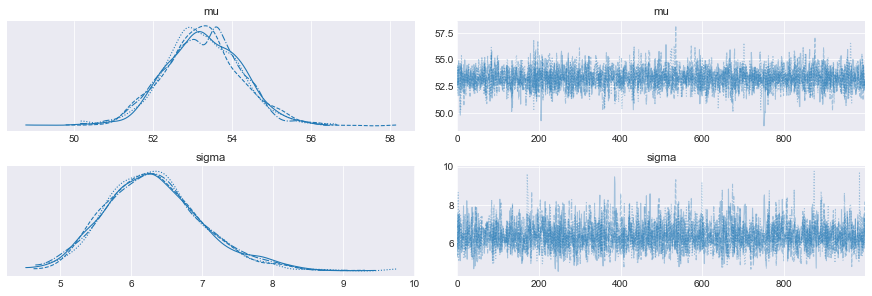

In [6]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd = 10)
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    trace_g = pm.sample(1100)
    
chain_g = trace_g[100:]
pm.traceplot(chain_g)

/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


Text(0.5, 0, '$x$')

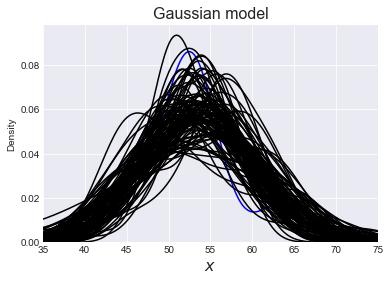

In [21]:
y_pred = pm.sample_posterior_predictive(chain_g, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i[0], c='k', alpha=0.05)

plt.xlim(35, 75)
plt.title('Gaussian model', fontsize=16)
plt.xlabel('$x$', fontsize=16)

In [22]:
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


<AxesSubplot:xlabel='day', ylabel='tip'>

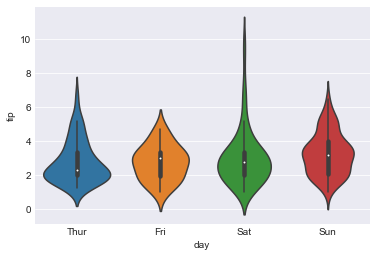

In [24]:
sns.violinplot(x='day', y='tip', data=tips)

In [34]:
#二つの変数を作る。tipの合計をyとし、カテゴリを表すダミー変数あるいはindexをidxとしまう。
y = tips['tip'].values
idx = pd.Categorical(tips['day']).codes

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sds, means]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 9 seconds.
/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


2


array([[<AxesSubplot:title={'center':'means'}>,
        <AxesSubplot:title={'center':'means'}>],
       [<AxesSubplot:title={'center':'sds'}>,
        <AxesSubplot:title={'center':'sds'}>]], dtype=object)

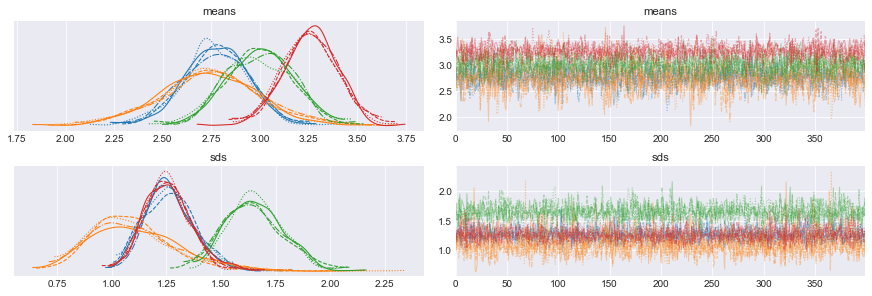

In [35]:
cnt = 1
with pm.Model() as comparing_groups:
    means = pm.Normal('means', mu=0, sd=10, shape=len(set(idx)))
    sds = pm.HalfNormal('sds', sd=10, shape=len(set(idx)))
    y =pm.Normal('y', mu=means[idx], sd=sds[idx], observed=y)
    
    trace_cg = pm.sample(500)
    cnt += 1
    print(cnt)

chain_cg = trace_cg[100::]
pm.traceplot(chain_cg)